# COMP5318 - Machine Learning and Data Mining: Assignment 1
<div style="text-align: right"> Due: Wednesday 14 Oct 2020 11:59PM </div>

The goal of this assignment is to build a classifier to classify some grayscale images of the size 28x28 into a set of categories. The dimension of the original data is large, so you need to be smart on which method you gonna use and perhaps perform a pre-processing step to reduce the amount of computation. Part of your marks will be a function of the performance of your classifier on the test set.

In [1]:
import h5py
import numpy as np
import os
print(os.listdir("./Input/train"))

[&#39;images_training.h5&#39;, &#39;labels_training.h5&#39;]


In [13]:
with h5py.File('./Input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./Input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)

(30000, 784) (30000,)


In [12]:
with h5py.File('./Input/test/images_testing.h5','r') as H:
    data_test = np.copy(H['datatest'])
with h5py.File('./Input/test/labels_testing_2000.h5','r') as H:
    label_test = np.copy(H['labeltest'])

# using H['datatest'], H['labeltest'] for test dataset.
print(data_test.shape,label_test.shape)

(5000, 784) (2000,)


Showing a sample data. The first example belongs to class 0: T-Shirt/Top

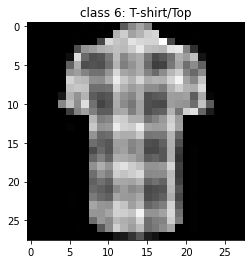

In [4]:
# import matplotlib.pyplot as plt
# data_train = data_train.reshape((data_train.shape[0], 28, 28))
# plt.imshow(data_train[0], cmap=plt.get_cmap('gray'))
# plt.title("class " + str(label_train[0]) + ": T-shirt/Top" )
# plt.show()

In [11]:
# #convert 3d to 2d training
# nsamples, nx, ny = data_train.shape
# d2_data_train = data_train.reshape((nsamples,nx*ny))
# print(data_train.shape)
# print(nsamples, nx, ny)
# print(data_test.shape)
# nsamples, nx, ny = data_test.shape
# print(nsamples, nx, ny)
# d2_data_test = data_test.reshape((nsamples,nx*ny))

(30000, 28, 28)
30000 28 28
(5000, 784)


ValueError: not enough values to unpack (expected 3, got 2)

In [47]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components=n_components, svd_solver="full")
#pca.fit(d2_data_train)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
X_train_pca = pca.fit_transform(data_train)
X_test_pca = pca.fit_transform(data_test)
len(X_train_pca)

30000

In [42]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
k = 10 # number of folds for cv
indices_cv = KFold(n_splits=10, random_state=None, shuffle=False) # indices for the k-folds
score_list_PCA = []
n_comp_list = np.arange(8, 17)
for K in n_comp_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    score = 0
    count = 1
    for train_index, test_index in indices_cv.split(X_train_pca):
        #print("comp", K, " fold", count)
        count+=1
        test_id = test_index
        train_id = train_index
        y_true = label_train[test_id]
        model = knn.fit(X_train_pca[train_id], label_train[train_id])
        #y_pred = model.predict(X_train_pca[test_index], label_train[test_id])
        score += model.score(X_train_pca[test_index], label_train[test_id])
    score_list_PCA.append(score/k)
score_list_PCA = np.array(score_list_PCA)


CPU times: user 1min 5s, sys: 610 ms, total: 1min 6s
Wall time: 1min 12s


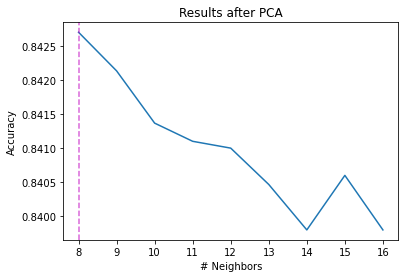

In [43]:
fig, ax = plt.subplots()
n_comp_list = np.arange(8, 17)
ax.plot(n_comp_list, score_list_PCA)
ax.axvline(n_comp_list[np.argmax(score_list_PCA)], c='m', linestyle='--', alpha=0.6)
ax.set_xlabel('# Neighbors')
ax.set_ylabel('Accuracy')
ax.set_xticks(n_comp_list)
ax.set_title('Results after PCA')
plt.show()

In [8]:
# %%time
# import numpy as np
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import KFold
# k = 10 # number of folds for cv
# indices_cv = KFold(n_splits=10, random_state=None, shuffle=False) # indices for the k-folds
# score_list_PCA = []
# n_comp_list = np.arange(5, 15)
# for K in n_comp_list:
#     knn = KNeighborsClassifier(n_neighbors=K)
#     score = 0
#     count = 1
#     for train_index, test_index in indices_cv.split(data_train):
#         print("comp", K, " fold", count)
#         count+=1
#         test_id = test_index
#         train_id = train_index
#         y_true = label_train[test_id]
#         model = knn.fit(d2_data_train[train_id], label_train[train_id])
#         #y_pred = model.predict(X_train_pca[test_index], label_train[test_id])
#         score += model.score(d2_data_train[test_index], label_train[test_id])
#     score_list_PCA.append(score/k)
# score_list_PCA = np.array(score_list_PCA)

comp 5  fold 1


In [ ]:
# fig, ax = plt.subplots()
# n_comp_list = np.arange(5, 15)
# ax.plot(n_comp_list, score_list_PCA)
# ax.axvline(n_comp_list[np.argmax(score_list_PCA)], c='m', linestyle='--', alpha=0.6)
# ax.set_xlabel('# Neighbors')
# ax.set_ylabel('Accuracy')
# ax.set_xticks(n_comp_list)
# ax.set_title('Results after PCA')
# plt.show()

In [15]:
data_test[1:5]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
print(X_train_pca.shape)
print(data_test.shape)
print(X_test_pca.shape)
print(label_test.shape)

(30000, 20)
(5000, 784)
(5000, 20)
(2000,)


In [50]:
%%time
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

y_true = label_test
knn = KNeighborsClassifier(n_neighbors=8, algorithm="kd_tree")
knn.fit(X_train_pca, label_train)
y_pred = knn.predict(X_test_pca)
print(knn.score(X_test_pca[:2000], label_test))


0.4525
CPU times: user 4.85 s, sys: 55.7 ms, total: 4.9 s
Wall time: 5.23 s


In [37]:
# y_true = np.array(y_true)
# print(y_true)
# y_pred = np.array(y_pred)
# print(y_pred)
# np.sum(y_true == y_pred[:2000])/len(y_true)

[1 8 1 ... 2 7 8]
[1 5 1 ... 7 0 0]


0.42